University of Zagreb, Faculty of Electrical Engineering and Computing

## Imagination or Recollection? Discovering Differences in Cognitive Experience through Data Science


#### Fani Sentinella-Jerbić, 2022


Exploratory Data Analysis performed on [Hippocorpus](https://msropendata.com/datasets/0a83fb6f-a759-4a17-aaa2-fbac84577318) - a dataset of 6,854 English diary-like short stories about recalled and imagined events.




In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # graph plotting
import seaborn as sns # beautify plots
import sklearn # machine learning
import matplotlib.pyplot as plt
import spacy
plt.style.use('seaborn-dark')

## Explanatory data analysis

In [104]:
df = pd.read_csv('hcV3-stories.csv')
df.shape

(6854, 23)

In [105]:
df['memType'].value_counts()

recalled    2779
imagined    2756
retold      1319
Name: memType, dtype: int64

In [106]:
df.isna().sum()[counts_by_features > 0]

annotatorAge          23
frequency           2756
importance           144
recAgnPairId        4235
recImgPairId        1526
similarity          4098
similarityReason    4098
dtype: int64

In [107]:
df = df.drop(columns=['annotatorAge', 'recAgnPairId', 'recImgPairId', 'similarity', 'similarityReason'])

In [108]:
df['frequency'] = df['frequency'].fillna(0)
df['importance'] = df['importance'].fillna(0)

Imagined stories have missing values for frequency and importance. Of course if a person never experienced an event they wouldn't recall it often and it wouldn't be important to them.

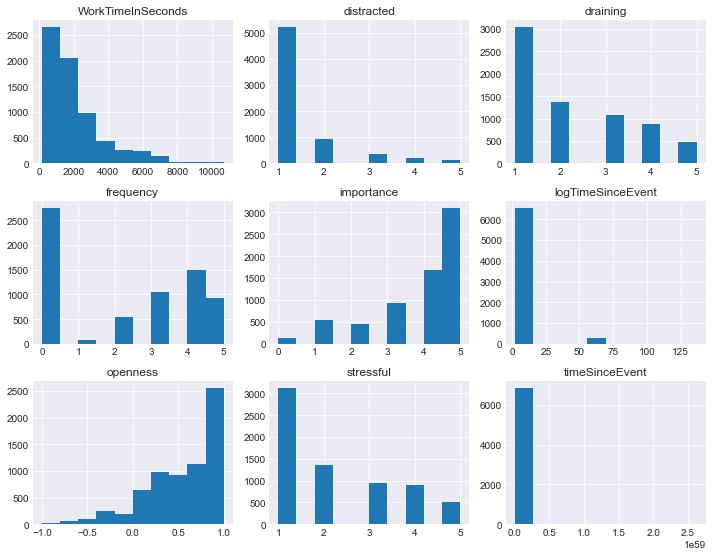

In [120]:
df.hist(figsize=(10, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

In [110]:
df.describe()

,WorkTimeInSeconds,distracted,draining,frequency,importance,logTimeSinceEvent,openness,stressful,timeSinceEvent
count,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03
mean,2094.556317,1.416837,2.182521,2.180187,3.869565,7.001817,0.559400,2.168223,2.107447e+56
std,1694.783925,0.890806,1.310124,1.956870,1.367921,13.200108,0.416494,1.325316,6.274173e+57
min,173.000000,1.000000,1.000000,0.000000,0.000000,1.945910,-1.000000,1.000000,7.000000e+00
25%,924.250000,1.000000,1.000000,0.000000,3.000000,3.555348,0.250000,1.000000,3.500000e+01
50%,1526.000000,1.000000,2.000000,3.000000,4.000000,4.499810,0.625000,2.000000,9.000000e+01
75%,2678.500000,1.000000,3.000000,4.000000,5.000000,5.010635,0.875000,3.000000,1.500000e+02
max,10680.000000,5.000000,5.000000,5.000000,5.000000,136.818082,1.000000,5.000000,2.626263e+59


<AxesSubplot:>

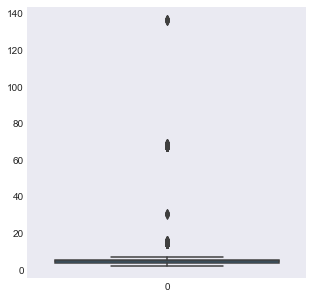

In [129]:
#df = df.drop(columns=['timeSinceEvent'])
plt.figure(figsize=(5,5))
sns.boxplot(data=df['logTimeSinceEvent'])

In [134]:
stories = df[['story', 'memType']]

In [137]:
stories.head()

,story,memType
0,"Concerts are my most favorite thing, and my bo...",imagined
1,"The day started perfectly, with a great drive ...",recalled
2,It seems just like yesterday but today makes f...,imagined
3,"Five months ago, my niece and nephew were born...",recalled
4,About a month ago I went to burning man. I was...,imagined
